### Importing Library

In [129]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [130]:
stroke_data = pd.read_csv("resampled_data.csv")
stroke_data.head()

,Unnamed: 0,gender,age,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,GlucoseLevelRange,BMIGroup,Hypertension_status,Heart_Diease_status
0,0,Male,67.0,Yes,Private,Urban,formerly smoked,1,60-80,200-250,Obese,Hypertension,No_Heart_Diease
1,1,Female,61.0,Yes,Self-employed,Rural,never smoked,1,60-80,200-250,Overweight,Hypertension,Heart_Diease
2,2,Male,80.0,Yes,Private,Rural,never smoked,1,80+,100-150,Obese,Hypertension,No_Heart_Diease
3,3,Female,49.0,Yes,Private,Urban,smokes,1,40-60,150-200,Obese,Hypertension,Heart_Diease
4,4,Female,79.0,Yes,Self-employed,Rural,never smoked,1,60-80,150-200,Normal,No_Hypertension,Heart_Diease


In [131]:
stroke_data.drop(columns=['Unnamed: 0'],inplace=True)
stroke_data.drop(columns=['age'],inplace=True)
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               5109 non-null   object
 1   ever_married         5109 non-null   object
 2   work_type            5109 non-null   object
 3   Residence_type       5109 non-null   object
 4   smoking_status       5109 non-null   object
 5   stroke               5109 non-null   int64 
 6   AgeGroup             5109 non-null   object
 7   GlucoseLevelRange    5109 non-null   object
 8   BMIGroup             5109 non-null   object
 9   Hypertension_status  5109 non-null   object
 10  Heart_Diease_status  5109 non-null   object
dtypes: int64(1), object(10)
memory usage: 439.2+ KB


The dataset consists of 5109 records (non-null) and 11 variables, including the stroke outcome variable.
The variables in the dataset are a mix of numeric (int64 and float64) and categorical (object) types:
Categorical variables: 'gender', 'Hypertension_status', 'Heart_Diease_status', 'ever_married','GlucoseLevelRange', 'work_type', 'BMIGroup', 'AgeGroup', 'stroke', 'Residence_type', and 'smoking_status'.

The 'stroke' variable, which is the target variable for the analysis, is a binary variable (int64) with values 0 and 1, representing no stroke and stroke, respectively.

We are using resampled data variables.

In [132]:
stroke_data.describe()

,stroke
count,5109.000000
mean,0.048738
std,0.215340
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


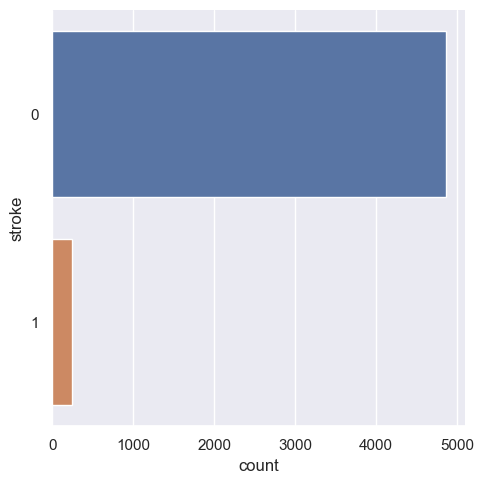

In [133]:
sb.catplot(y="stroke", data=stroke_data, kind="count")
plt.show()

The barchart illustrates the number pf people who got stroke.

In [134]:
count1, count0 = stroke_data['stroke'].value_counts()
print("Ratio of classes is 1 : 0 = ", count1, ":", count0)

Ratio of classes is 1 : 0 =  4860 : 249


This is the ratio of the people with stroke is to with no stroke.

The class imbalance in the 'stroke' variable, with a ratio of 4860 (class 0: no stroke) to 249 (class 1: stroke), can lead to some problems in Classification model but we will try to improve it later.

In [135]:
# Categorical predictors
stroke_data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Hypertension_status', 'Heart_Diease_status']].describe()

,gender,ever_married,work_type,Residence_type,smoking_status,Hypertension_status,Heart_Diease_status
count,5109,5109,5109,5109,5109,5109,5109
unique,2,2,5,2,4,2,2
top,Female,Yes,Private,Urban,never smoked,Hypertension,Heart_Diease
freq,2994,3353,2924,2596,1892,4611,4833


This data specifies the catgorical variables of the dataset where:
- count: specifies the total number of people
- unique: the types of the each specified variables
- top: the most that appeared in each variables
- fre: the most that each top variable appeared

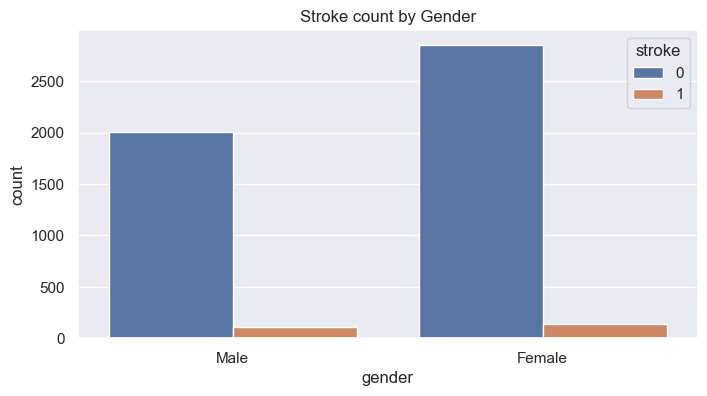

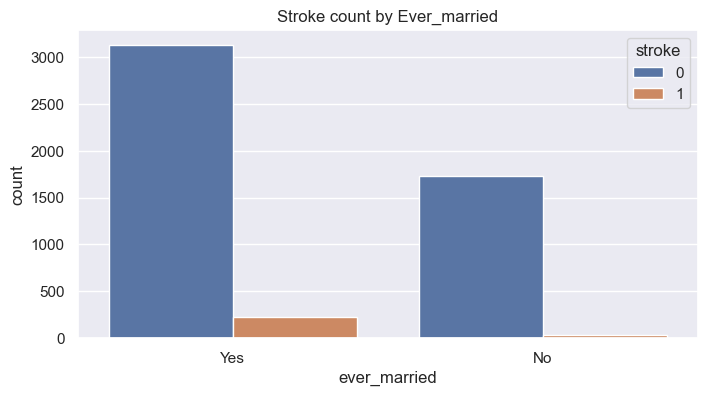

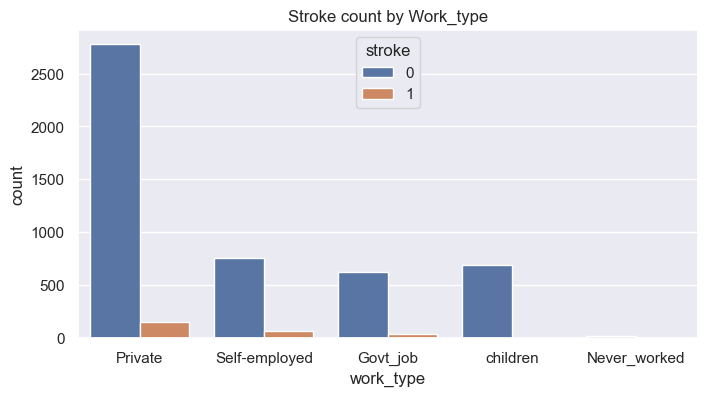

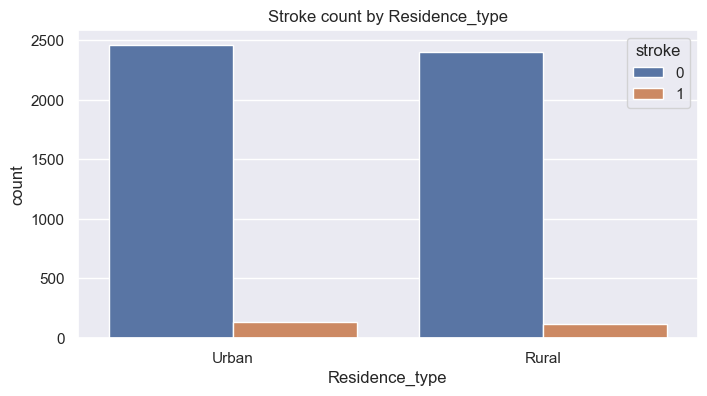

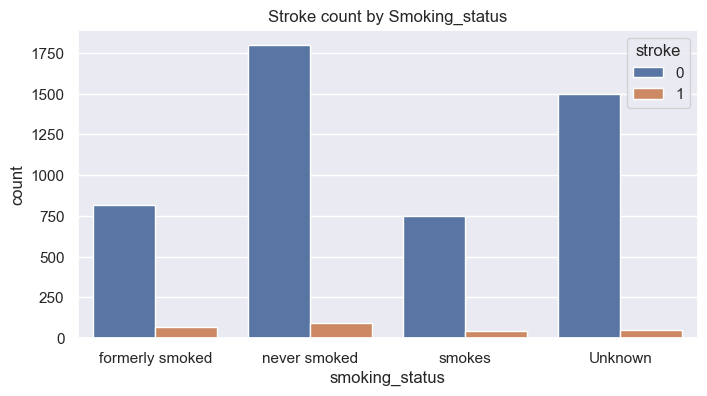

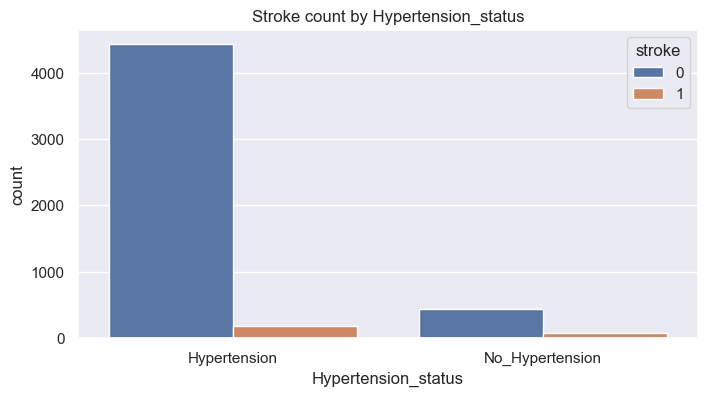

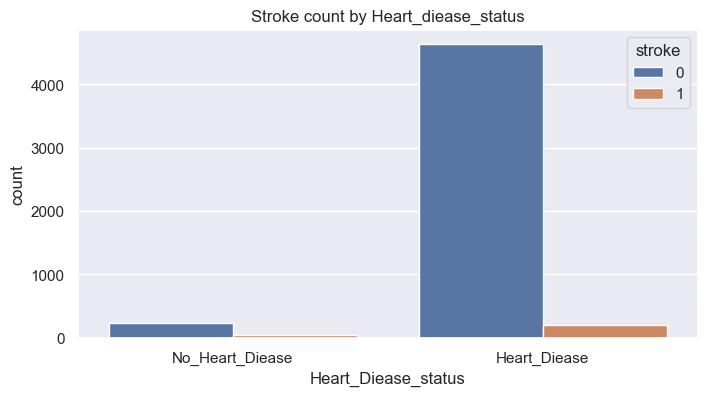

In [137]:
categorical_vars =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Hypertension_status', 'Heart_Diease_status']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sb.countplot(x=var, hue='stroke', data=stroke_data)
    plt.title(f'Stroke count by {var.capitalize()}')
    plt.show()

In [138]:
gender_stroke_count = stroke_data.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_ratio = gender_stroke_count.div(gender_stroke_count.sum(axis=1), axis=0)

print(gender_stroke_ratio)

stroke         0         1
gender                    
Female  0.952906  0.047094
Male    0.948936  0.051064


In [139]:
print("The probability of having stroke within each unique variable:")
print()
print()
print()

# Print stroke count and percentage by gender
print(stroke_data.groupby('gender')['stroke'].value_counts(normalize=True))
print()
print()

# Print stroke count and percentage by ever_married
print(stroke_data.groupby('ever_married')['stroke'].value_counts(normalize=True))
print()
print()

# Print stroke count and percentage by work_type
print(stroke_data.groupby('work_type')['stroke'].value_counts(normalize=True))
print()
print()


# Print stroke count and percentage by Residence_type
print(stroke_data.groupby('Residence_type')['stroke'].value_counts(normalize=True))
print()
print()

# Print stroke count and percentage by smoking_status
print(stroke_data.groupby('smoking_status')['stroke'].value_counts(normalize=True))
print()

# Print stroke count and percentage by AgeGroup
print(stroke_data.groupby('AgeGroup')['stroke'].value_counts(normalize=True))
print()
print()

# Print stroke count and percentage by GlucoseLevelRange
print(stroke_data.groupby('GlucoseLevelRange')['stroke'].value_counts(normalize=True))
print()
print()

# Print stroke count and percentage by BMIGroup
print(stroke_data.groupby('BMIGroup')['stroke'].value_counts(normalize=True))
print()
print()


# Print stroke count and percentage by Hypertension_status
print(stroke_data.groupby('Hypertension_status')['stroke'].value_counts(normalize=True))
print()
print()

# Print stroke count and percentage by Heart_Diease_status
print(stroke_data.groupby('Heart_Diease_status')['stroke'].value_counts(normalize=True))
print()
print()

The probability of having stroke within each unique variable:



gender  stroke
Female  0         0.952906
        1         0.047094
Male    0         0.948936
        1         0.051064
Name: stroke, dtype: float64


ever_married  stroke
No            0         0.983485
              1         0.016515
Yes           0         0.934387
              1         0.065613
Name: stroke, dtype: float64


work_type      stroke
Govt_job       0         0.949772
               1         0.050228
Never_worked   0         1.000000
Private        0         0.949042
               1         0.050958
Self-employed  0         0.920635
               1         0.079365
children       0         0.997089
               1         0.002911
Name: stroke, dtype: float64


Residence_type  stroke
Rural           0         0.954636
                1         0.045364
Urban           0         0.947997
                1         0.052003
Name: stroke, dtype: float64


smoking_status   stroke
Unknown          0  

In [140]:
print("This is frequency of different types variables:")
print("\n")
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Hypertension_status', 'Heart_Diease_status']

for var in categorical_vars:
    print(f"Frequency count for {var}:")
    print(stroke_data[var].value_counts())
    print("\n")

This is frequency of different types variables:


Frequency count for gender:
Female    2994
Male      2115
Name: gender, dtype: int64


Frequency count for ever_married:
Yes    3353
No     1756
Name: ever_married, dtype: int64


Frequency count for work_type:
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Frequency count for Residence_type:
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


Frequency count for smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


Frequency count for Hypertension_status:
Hypertension       4611
No_Hypertension     498
Name: Hypertension_status, dtype: int64


Frequency count for Heart_Diease_status:
Heart_Diease       4833
No_Heart_Diease     276
Name: Heart_Diease_status, dtype: int64




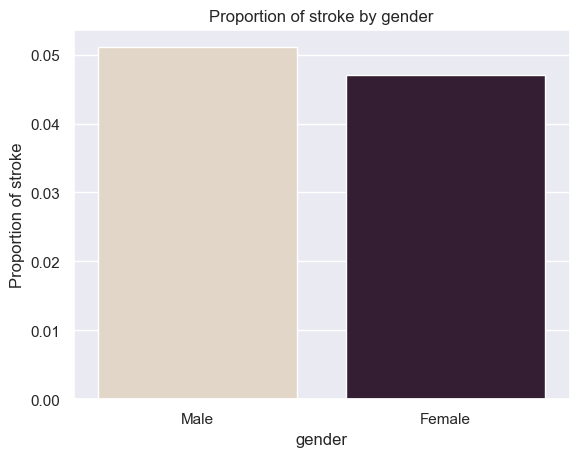

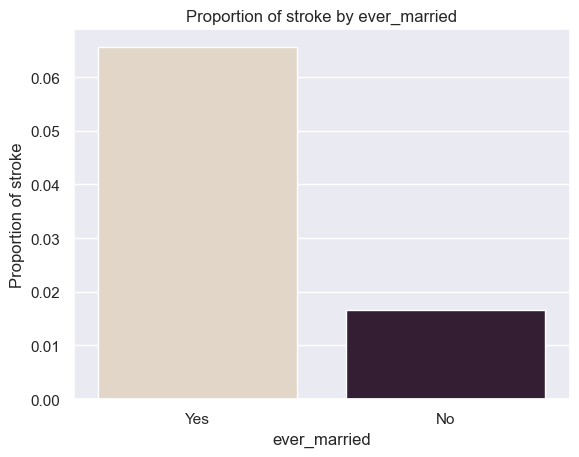

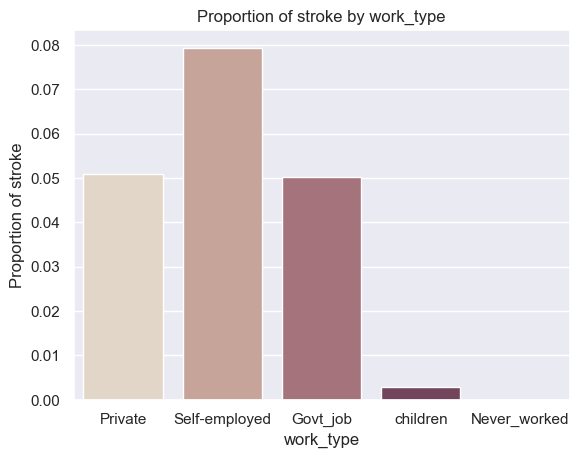

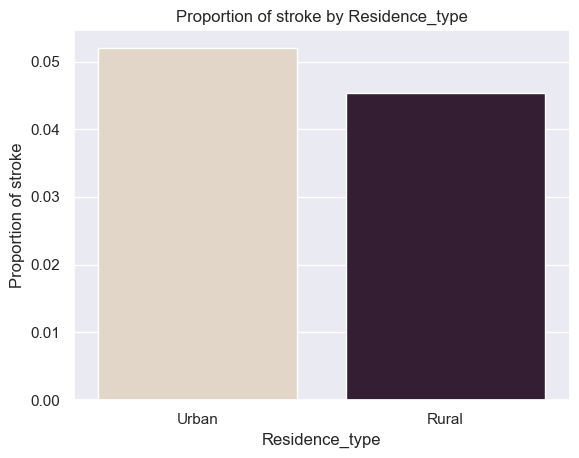

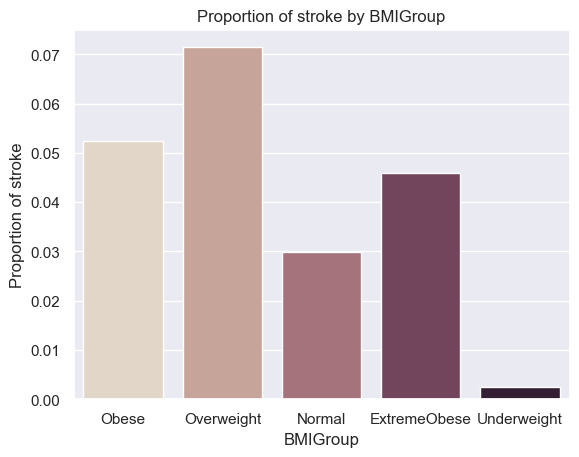

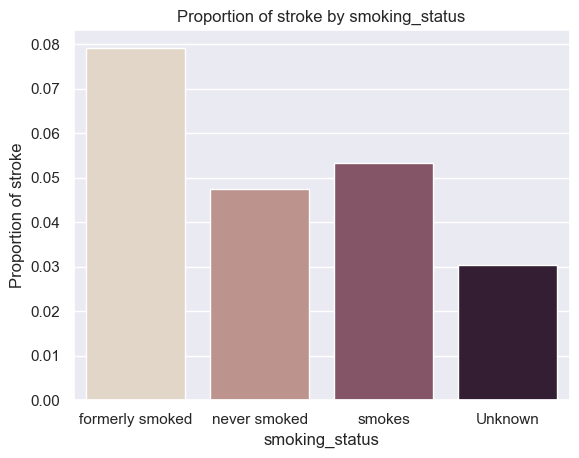

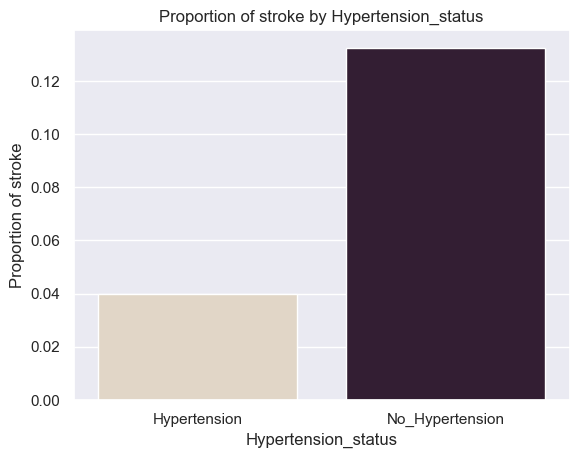

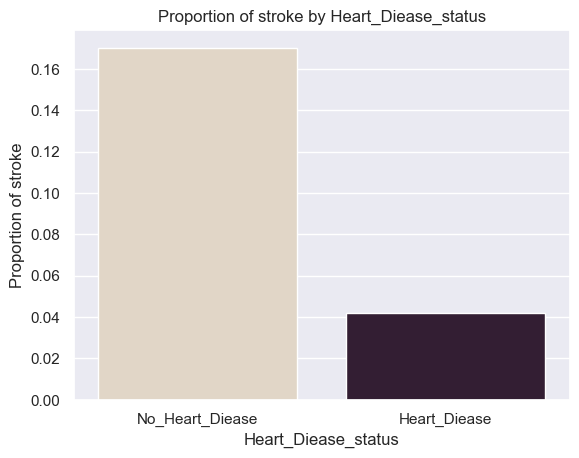

In [141]:
for column in categorical_columns:
    #plt.figure(figsize=(8, 4))
    sb.barplot(x=column, y='stroke', data=stroke_data, ci=None, palette="ch:.25")
    plt.title(f"Proportion of stroke by {column}")
    plt.ylabel("Proportion of stroke")
    plt.show(block=True)

In [142]:
from scipy.stats import chi2_contingency

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'BMIGroup', 'smoking_status', 'Hypertension_status', 'Heart_Diease_status']
for column in categorical_columns:
    contingency_table = pd.crosstab(stroke_data[column], stroke_data['stroke'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{column}: Chi2 = {chi2:.2f}, p-value = {p_value:.5f}")

gender: Chi2 = 0.34, p-value = 0.55983
ever_married: Chi2 = 58.87, p-value = 0.00000
work_type: Chi2 = 49.16, p-value = 0.00000
Residence_type: Chi2 = 1.07, p-value = 0.29983
BMIGroup: Chi2 = 46.15, p-value = 0.00000
smoking_status: Chi2 = 29.23, p-value = 0.00000
Hypertension_status: Chi2 = 81.57, p-value = 0.00000
Heart_Diease_status: Chi2 = 90.23, p-value = 0.00000


These are the results of chi-square tests conducted on different categorical variables. The null hypothesis for each test is that there is no association between the two variables being compared.

- For gender, which indicates that there is no significant association between gender and stroke.

- For ever_married, which suggests a significant association between being ever married and stroke.

- For work_type, indicating a significant association between work type and stroke.

- For Residence_type, indicating that there is no significant association between residence type and stroke.

- For smoking_status, indicating a significant association between smoking status and stroke.

- For BMIGroup, which suggests a significant association between BMI group and stroke.

- For GlucoseLevelRange, indicating a significant association between glucose level range and stroke.

- For AgeGroup, which suggests a highly significant association between age group and stroke.

- For Hypertension_status, indicating a significant association between Hypertension_status and stroke.

- For Heart_Diease_status, indicating a significant association between Heart_Diease_status and stroke.


Based on the correlation matrix and the chi-squared test results, you can observe the following:

For the categorical variables, AgeGroup, GlucoseLevelRange, BMIGroup, smoking_status, work_type, Hypertension_status, Heart_Diease_status and ever_married have significant associations with stroke, as indicated by their low p-values (p < 0.05). Residence_type and gender do not show a significant association with stroke, given their higher p-values (p > 0.05).

Taking these results into account, the variables that seem to impact stroke the most are AgeGroup, GlucoseLevelRange, ever_married, work_type, and smoking_status. It's important to note that correlation and association do not imply causation, so further analysis, such as logistic regression or other modeling techniques, may be required to better understand the relationships between these variables and stroke occurrence.


From there, we will focus only on variables: AgeGroup, heart_disease, hypertension, GlucoseLevelRange, and smoking_status as it has higher associations compared to other variables.
